In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load saved model
model = load_model('undertone_model.h5')

In [3]:
# 2. Load test dataset from validation split
datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_directory(
    'dataset', target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False
)

Found 1489 images belonging to 4 classes.


In [4]:
# 3. Predict
pred = model.predict(test_gen)
y_pred = np.argmax(pred, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/47 ━━━━━━━━━━━━━━━━━━━━ 1:05 3s/step

In [5]:
# 4. Classification report
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

        cool       0.95      1.00      0.97       399
     neutral       0.75      0.82      0.78       276
       olive       0.86      0.80      0.83       395
        warm       0.88      0.84      0.85       419

    accuracy                           0.87      1489
   macro avg       0.86      0.86      0.86      1489
weighted avg       0.87      0.87      0.87      1489



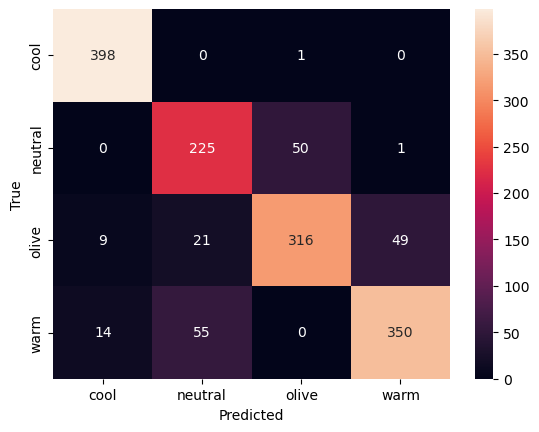

In [6]:
# 5. Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
plt.xlabel('Predicted'), plt.ylabel('True')
plt.show()


In [7]:
# Evaluate on test data
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc * 100:.2f}%")


47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9006 - loss: 0.4492
Test Accuracy: 86.57%


In [8]:
print("Evaluating model: 'undertone_model.h5'")


Evaluating model: 'undertone_model.h5'
